## Project 4: Predicting Diabetes in Respondents

We can sketch out the data science process as follows:
1. [Define the problem.](#Step-1:-Define-the-problem.)
2. [Obtain the data.](#Step-2:-Obtain-the-data.)
3. [Explore the data.](#Step-3:-Explore-the-data.)
4. [Model the data.](./02A_Modelling_Balanced.ipynb)
5. [Evaluate the model.](./02A_Modelling_Balanced.ipynb)
6. [Answer the problem.](./02A_Modelling_Balanced.ipynb)

In this project, we're going to focus on steps exploring data, building models and evaluating the models we build.

## Step 1: Define the problem.

Suppose you're part of a data science team at the Ministry of Health (MOH), ministry of the Government of Singapore responsible for managing the public healthcare system in Singapore. In recent discussions with healthcare providers, you've noticed growing health-consciousness around diabetes.

For instance, you learn about Jasmine, a 30-year-old marketing executive working in a fast-paced agency in Singapore. She feels that she is generally healthy as she has no major medical history, goes for a yearly health check-up and exercises at a spin studio 1-2 times a week.

Jasmine believes that health is wealth. She also believes that while access to good healthcare is a basic need, leading a healthy life starts from the individual.

Jasmine hopes to improve her overall well-being by adopting healthier eating habits. She also wants to learn how better nutrition could help to reduce her risk for certain chronic diseases, particularly diabetes.

With an emphasis on career-building in recent years, long working hours, high stress and irregular meals are the norm for Jasmine. She fears that her current lifestyle could impact her health in the longer term.

This scenario, while simplified, illustrates the growing health-consciousness regarding diabetes among young adults. In Singapore, with its unique population demographics and lifestyle patterns, the challenge is not only diagnosing but also predicting and managing diabetes effectively to reduce long-term complications and healthcare burdens.

**Real-world problem**: Enhance the early detection and predictive management of diabetes among Singaporeans to improve patient outcomes and reduce the healthcare system's strain.

**Data science problem**: Develop a predictive model that accurately identifies individuals at high risk of developing diabetes, utilizing healthcare data to minimize false negatives (missed diagnoses) and false positives (unnecessary interventions), thereby enabling targeted and timely healthcare interventions.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("./data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Initial EDA
1. Checking the Diabetes_binary Variable
We'll start by examining the balance of the Diabetes_binary variable to understand if class imbalance might be a concern for our predictive modeling.

2. Comparing Each Variable with Diabetes_binary
After ensuring the target variable's distribution is understood, we'll compare each feature with Diabetes_binary to identify potential predictors of diabetes risk.

3. Patterns of Missingness
We will check for missing data in each variable to assess if any feature has extensive missingness that could impact our analysis. We'll also consider if the missingness can be explained by the data dictionary, indicating if it's missing at random or not.

4. Distributions of Each Variable
Understanding the distribution of each variable helps identify if certain features might not be predictive because they overwhelmingly take on one value.

5. Checking for Correlations Among Features
Lastly, if considering linear models like logistic or linear regression, we'll examine the correlations among features to decide on including interaction terms or removing correlated features to avoid multicollinearity.

Let's start with the first step: examining the balance of the Diabetes_binary variable.

In [ ]:
# Check the balance of the `Diabetes_binary` variable
diabetes_binary_distribution = df['Diabetes_binary'].value_counts(normalize=True) * 100

diabetes_binary_distribution


Diabetes_binary
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

### Distribution of the `Diabetes_binary` variable
'Diabetes_binary' variable in the dataset shows an even split, with 50% of the individuals having diabetes (1) and the remaining 50% not having diabetes (0). This indicates that the dataset is balanced

This setup allows for potentially more accurate predictions across both classes and could improve the performance of various classifiers without the need for specialized handling of class imbalance.

- **Investigate potential predictors**: With a balanced dataset, analyzing the relationship between `Diabetes_binary` and other variables becomes even more critical to identifying meaningful predictors. This analysis could involve calculating correlations for numerical variables and utilizing appropriate statistical tests for categorical variables to discern their predictive value.

Next steps in the analysis could include:
- **Correlation Analysis**: Proceed with calculating the correlation between `Diabetes_binary` and numerical variables to identify which ones may have a stronger relationship with the diabetes outcome. Correlation coefficients can provide initial insights into potential predictors.
- **Further Statistical Testing**: For categorical variables, consider chi-square tests or logistic regression analysis to evaluate their association with diabetes status.
- **Feature Engineering and Selection**: Based on the correlation analysis and statistical testing, further refine the feature set through engineering new variables or selecting the most relevant predictors for modeling.

In [ ]:
# Calculate the correlation of numerical variables with `Diabetes_binary`
correlations = df.corr()['Diabetes_binary'].sort_values()

correlations


Income                 -0.224449
Education              -0.170481
PhysActivity           -0.158666
HvyAlcoholConsump      -0.094853
Veggies                -0.079293
Fruits                 -0.054077
AnyHealthcare           0.023191
NoDocbcCost             0.040977
Sex                     0.044413
Smoker                  0.085999
MentHlth                0.087029
CholCheck               0.115382
Stroke                  0.125427
HeartDiseaseorAttack    0.211523
PhysHlth                0.213081
DiffWalk                0.272646
Age                     0.278738
HighChol                0.289213
BMI                     0.293373
HighBP                  0.381516
GenHlth                 0.407612
Diabetes_binary         1.000000
Name: Diabetes_binary, dtype: float64

### Correlation analysis with Diabetes_binary
Analysis revealed several variables with notable associations:

Positive Correlations: Variables like GenHlth (general health), HighBP (high blood pressure), DiffWalk (difficulty walking), BMI, HighChol (high cholesterol), Age, HeartDiseaseorAttack, PhysHlth (physical health), and Stroke show positive correlations with Diabetes_binary. This suggests that as these variable values increase (indicating poorer health or higher risk factors), so does the likelihood of diabetes.

Negative Correlations: Variables such as Income and Education show negative correlations with Diabetes_binary. This implies that higher income or education levels might be associated with a lower risk of diabetes, which could reflect factors like better access to healthy food options, healthcare, or more knowledge about health management.

Next, let's investigate the patterns of missingness in the dataset to determine if any variables are missing extensively, which could be problematic for our analysis.

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

missing_values_percentage = (missing_values / len(df)) * 100

missing_values_percentage


Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

### No missing values
The dataset does not have any missing values across all variables, which is excellent news for our analysis. This means we won't need to impute missing data or exclude variables due to extensive missingness, allowing for a more comprehensive analysis of the factors affecting diabetes risk.

Next, let's examine the distributions of each variable to identify if certain features might not be predictive due to overwhelmingly taking on one value. This can help us understand the variability within each feature and its potential influence on the target variable. We'll plot the distributions of a few select variables that are of interest and could have predictive value based on our earlier correlation analysis.

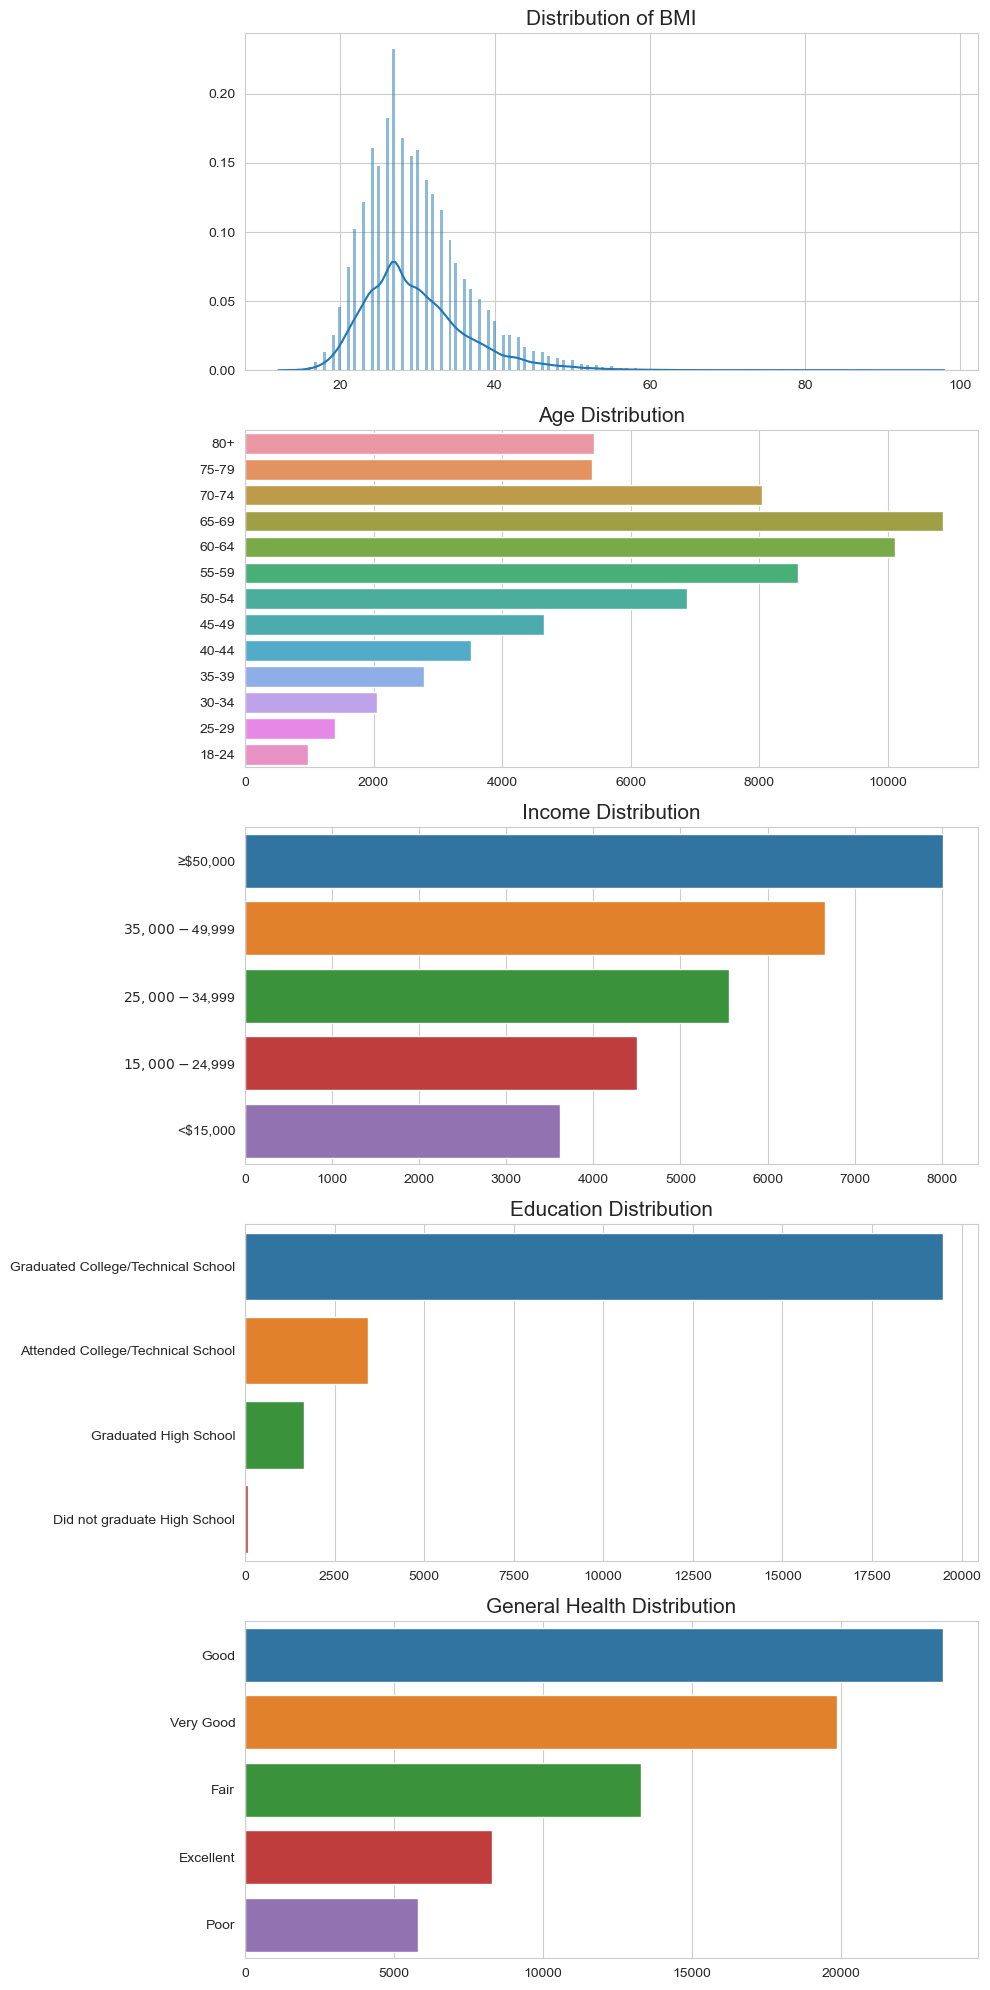

In [ ]:
# Adjusting variable labels based on the detailed data dictionary for better clarity in the plots

# Mapping for General Health
gen_hlth_mapping = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}
df['GenHlth_Label'] = df['GenHlth'].map(gen_hlth_mapping)

# Age Category Labels (simplified for plotting)
age_labels = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
    11: '70-74', 12: '75-79', 13: '80+', 14: 'Unknown'
}
df['Age_Label'] = df['Age'].map(age_labels)

# Income Category Labels
income_labels = {
    1: '<$15,000', 2: '$15,000-$24,999', 3: '$25,000-$34,999', 4: '$35,000-$49,999',
    5: '≥$50,000', 9: 'Unknown'
}
df['Income_Label'] = df['Income'].map(income_labels)

# Education Level Labels
education_labels = {
    1: 'Did not graduate High School', 2: 'Graduated High School',
    3: 'Attended College/Technical School', 4: 'Graduated College/Technical School',
    9: 'Unknown'
}
df['Education_Label'] = df['Education'].map(education_labels)

# Plotting distributions with updated labels
variables_to_plot = ['BMI', 'Age_Label', 'Income_Label', 'Education_Label', 'GenHlth_Label']
titles = ['Distribution of BMI', 'Age Distribution', 'Income Distribution', 'Education Distribution', 'General Health Distribution']

# Adjusted plotting code
fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=1, figsize=(10, 20))

for i, var in enumerate(variables_to_plot):
    if var == 'BMI':
        sns.histplot(df[var], ax=axes[i], kde=True, stat="density", linewidth=0)
    elif var == 'Age_Label':
        # For Age_Label, explicitly specify the order based on the age_labels dictionary keys to ensure correct sequence
        ordered_age_labels = [age_labels[i] for i in range(1, 14)]  # 14 is exclusive to include up to 'Unknown'
        ordered_age_labels = ordered_age_labels[::-1]  # Reverse the list
        sns.countplot(y=var, data=df, ax=axes[i], order=ordered_age_labels)
    else:
        sns.countplot(y=var, data=df, ax=axes[i], order=df[var].value_counts().index)
    axes[i].set_title(titles[i]).set_size(15)
    axes[i].set_xlabel('').set_size(15)
    axes[i].set_ylabel('').set_size(15)

plt.tight_layout()
plt.show()


## Observations
### BMI (Body Mass Index)
Observation: The distribution is right-skewed, indicating a prevalence of overweight and obese individuals in the dataset.
Context: Given that obesity is a significant risk factor for diabetes, the BMI variable's predictive value is underscored by its distribution. This suggests that interventions targeting weight management could be crucial for diabetes prevention.

### Age
Observation: The distribution is fairly uniform across different age categories.
Context: Age is a categorical variable with distinct groups representing different age ranges. The uniform distribution across these categories suggests that diabetes risk is not concentrated in any single age group, highlighting the importance of age-specific interventions. The progression from younger to older age categories could also reflect increasing diabetes risk with age, a known factor in diabetes prevalence.

### Income
Observation: Broad distribution across various income categories.
Context: Income levels are categorical, ranging from less than $15,000 to $50,000 or more. The distribution across these categories suggests a socio-economic dimension to diabetes risk, with lower income potentially associated with higher diabetes prevalence due to factors like access to healthy food and healthcare.

### Education
Observation: Distribution across various levels of educational attainment.
Context: Education is an ordinal variable, with categories ranging from not graduating high school to graduating from college or technical school. The distribution here could indicate that higher education levels might be inversely related to diabetes risk, possibly due to better health literacy and socio-economic status.

### General Health (GenHlth)
Observation: Skewed towards healthier individuals but with a noticeable proportion rating their health as poor.
Context: General health is rated on a 1-5 scale, from excellent to poor. The skew towards healthier ratings with a significant portion of poor ratings highlights the subjective perception of health and its potential link to objective health outcomes like diabetes.

### High Blood Pressure (HighBP)
Observation: A significant portion of the dataset reports high blood pressure.
Context: High blood pressure is a binary variable indicating the presence or absence of this condition. Its distribution and known link to diabetes underscore its importance as a risk factor and a potential target for preventive measures.

### Physical Activity (PhysActivity)
Observation: Larger proportion of individuals engaging in physical activity.
Context: Physical activity is a binary variable indicating engagement in physical activity outside of one's job in the past 30 days. The prevalence of physical activity in the dataset is encouraging, as it is a protective factor against diabetes, highlighting the value of promoting physical activity in diabetes prevention efforts.


With the detailed context provided by the data dictionary, these insights help inform our understanding of the risk factors for diabetes and underscore the importance of certain variables in predicting diabetes risk. This detailed understanding is essential for the next steps in our analysis, whether it be further exploratory data analysis, feature engineering, or preparing the data for predictive modeling.

## Next
Construct a logistic regression model predicting diabetes status (Diabetes_binary) from the other variables, we'll follow these steps:

Feature Selection: Choose which features to include in the model.
Data Preprocessing: Prepare the data for modeling, including handling categorical variables (via one-hot encoding or similar), scaling quantitative features, and dealing with any missing or problematic data.
Train/Test Split: Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
Model Building: Construct and train the logistic regression model using the training set.
Evaluation: Evaluate the model's performance on the testing set.
For the categorical feature, we could use Sex (already binary), and for the quantitative feature, BMI seems like a natural choice given its significance as a risk factor for diabetes. We'll also include other features but will ensure these two are part of the model.

### 1. Creating interaction terms
Interaction terms can help uncover these relationships, potentially improving model performance.

Let’s choose a couple of variables where we suspect interaction might be significant. For instance, BMI and HighBP (high blood pressure) could interact in predicting diabetes, as both are related to metabolic health. Similarly, the effect of Age on diabetes risk might differ by levels of physical activity (PhysActivity), suggesting another interaction.

Here's how we can create interaction terms for these variables and include them in the logistic regression model:

Create Interaction Terms: Multiply the variables together to create new interaction features.
Update the Model: Include these interaction terms in the logistic regression model.
Evaluate: Assess the model's performance to see if the interaction terms provide any improvement.
Let's proceed with creating these interaction terms and updating our model accordingly.

In [ ]:
df['BMI_HighBP_interaction'] = df['BMI'] * df['HighBP']

In [ ]:
df['Age_PhysActivity_interaction'] = df['Age'] * df['PhysActivity']

Include all variables (including the newly created interaction terms), then consider dropping some if there's evidence of overfitting.

In [ ]:
df.dtypes

Diabetes_binary                 float64
HighBP                          float64
HighChol                        float64
CholCheck                       float64
BMI                             float64
Smoker                          float64
Stroke                          float64
HeartDiseaseorAttack            float64
PhysActivity                    float64
Fruits                          float64
Veggies                         float64
HvyAlcoholConsump               float64
AnyHealthcare                   float64
NoDocbcCost                     float64
GenHlth                         float64
MentHlth                        float64
PhysHlth                        float64
DiffWalk                        float64
Sex                             float64
Age                             float64
Education                       float64
Income                          float64
GenHlth_Label                    object
Age_Label                        object
Income_Label                     object


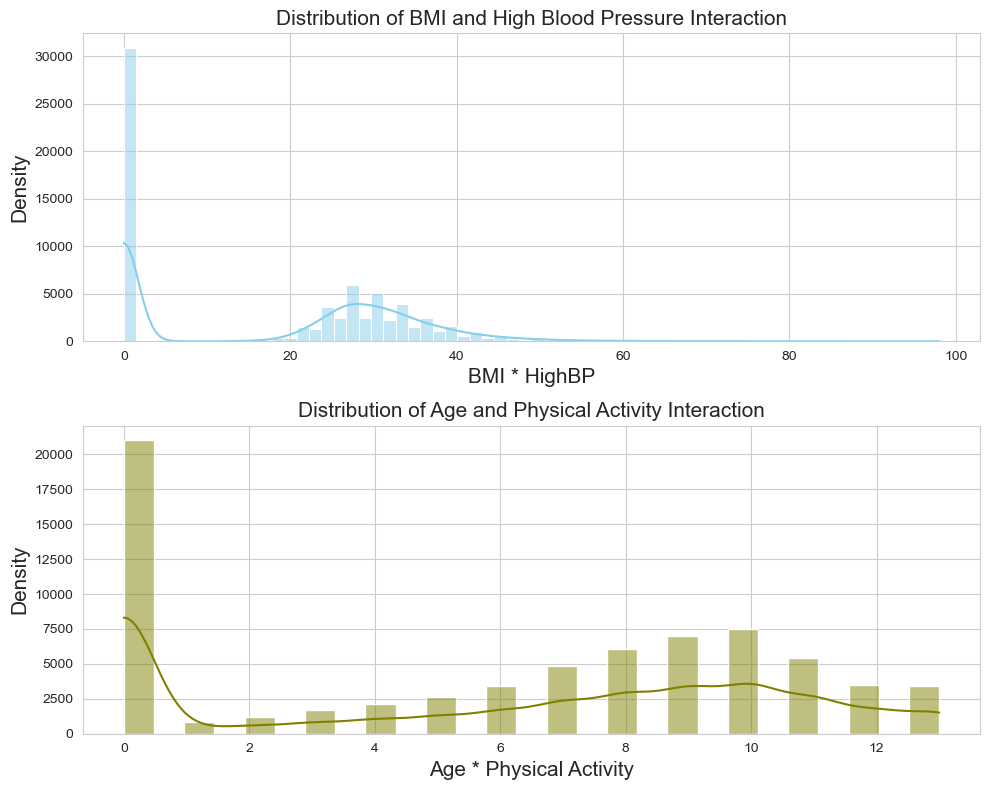

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of the interaction terms
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Distribution of BMI_HighBP_interaction
sns.histplot(df['BMI_HighBP_interaction'], ax=axes[0], kde=True, color="skyblue")
axes[0].set_title('Distribution of BMI and High Blood Pressure Interaction').set_size(15)
axes[0].set_xlabel('BMI * HighBP').set_size(15)
axes[0].set_ylabel('Density').set_size(15)

# Distribution of Age_PhysActivity_interaction
sns.histplot(df['Age_PhysActivity_interaction'], ax=axes[1], kde=True, color="olive")
axes[1].set_title('Distribution of Age and Physical Activity Interaction').set_size(15)
axes[1].set_xlabel('Age * Physical Activity').set_size(15)
axes[1].set_ylabel('Density').set_size(15)

plt.tight_layout()
plt.show()


## Observations for interaction terms
The distributions for both BMI * High Blood Pressure and Age * Physical Activity interactions have been visualized. From the plots, we observe the following:

### BMI and High Blood Pressure Interaction
This distribution appears to have a significant peak at the lower end, indicating that a large number of individuals either have a low BMI, do not have high blood pressure, or both. The distribution then tails off, suggesting fewer individuals have both high BMI and high blood pressure.

### Age and Physical Activity Interaction
This distribution also shows a notable peak at the lower end, which could indicate a significant number of younger individuals being physically active or older individuals not being physically active. The distribution tails off as the interaction value increases, suggesting fewer older individuals remain physically active or that physical activity decreases with age.

### Next
Explore how these interactions correlate with the Diabetes_binary outcome. This will help us understand if there's a visible trend or pattern that indicates the influence of these interactions on diabetes status. I'll create scatter plots to visualize these relationships. ​

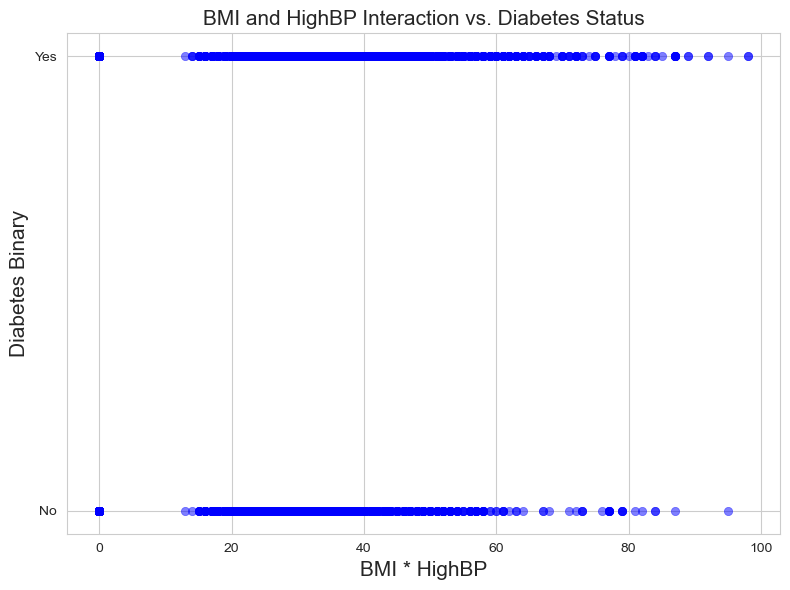

In [ ]:
# Scatter plot to explore the relationship between BMI_HighBP_interaction and Diabetes_binary outcome
plt.figure(figsize=(8, 6))

# BMI_HighBP_interaction vs. Diabetes_binary
sns.scatterplot(data=df, x='BMI_HighBP_interaction', y='Diabetes_binary', alpha=0.5, edgecolor=None, color="blue")
plt.title('BMI and HighBP Interaction vs. Diabetes Status').set_size(15)
plt.xlabel('BMI * HighBP').set_size(15)
plt.ylabel('Diabetes Binary').set_size(15)
plt.yticks([0, 1], ['No', 'Yes'])  # Set custom y-tick labels

plt.tight_layout()
plt.show()


### BMI and HighBP Interaction vs. Diabetes Status

The scatter plots visualize the relationship between the interaction terms (BMI * High Blood Pressure and Age * Physical Activity) and the binary diabetes outcome.

This plot shows a somewhat dispersed distribution, indicating that individuals with higher BMI and high blood pressure interaction values are present across both diabetes and no diabetes categories. However, there's a hint that higher interaction values may be slightly more common among individuals with diabetes.

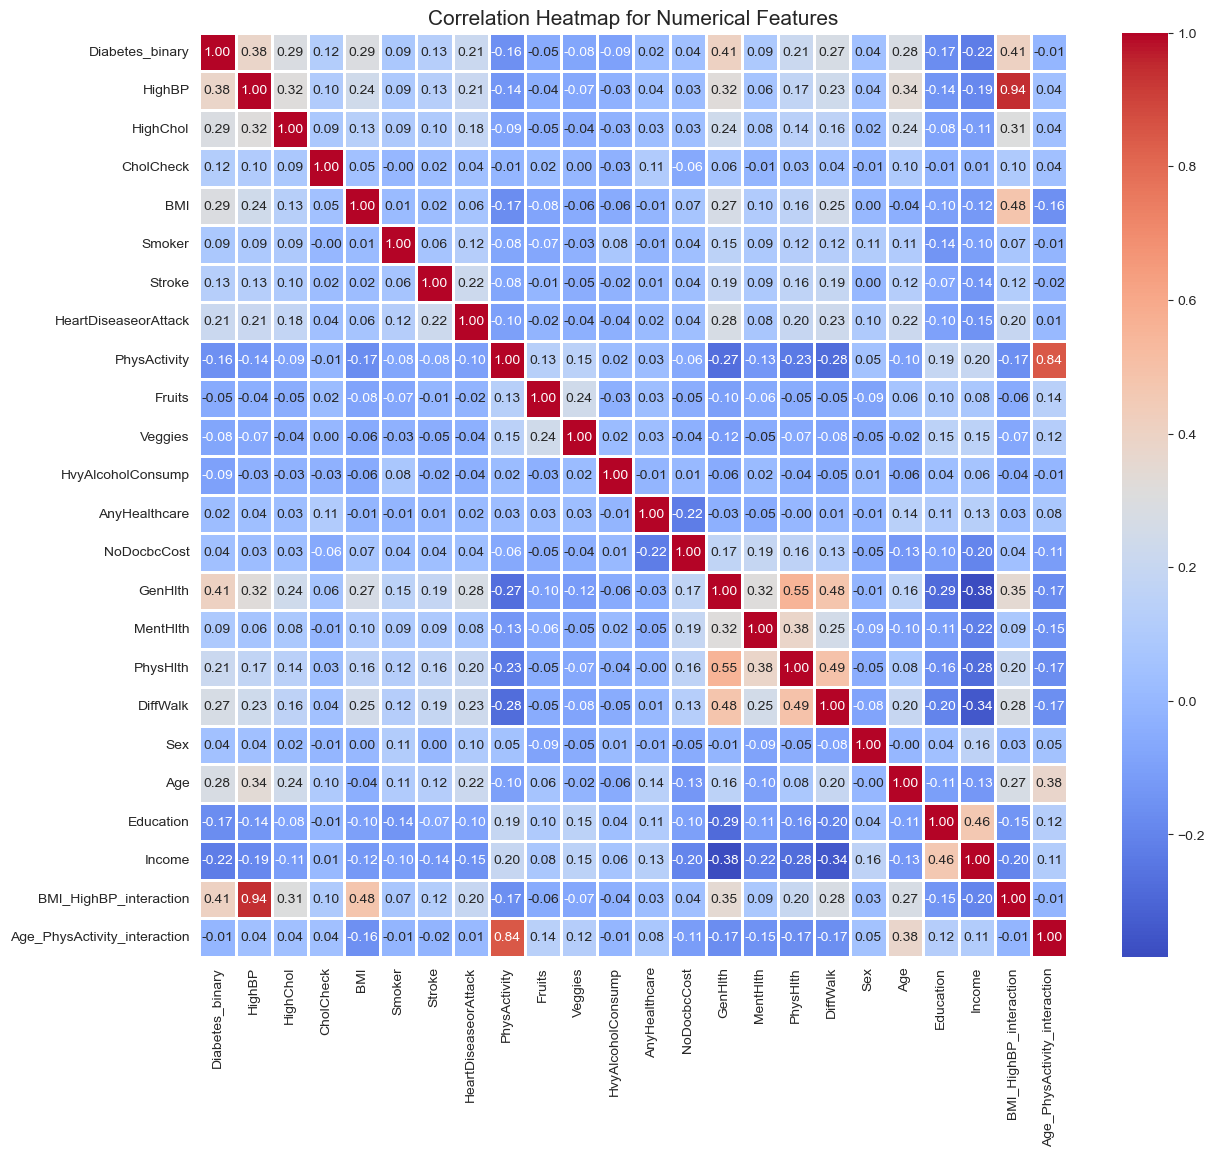

In [ ]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix on numerical columns only
corr_matrix_numerical = numerical_df.corr()

# Generate a heatmap for the numerical correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_numerical, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=2)
plt.title('Correlation Heatmap for Numerical Features').set_size(15)
plt.show()


### Correlation Heatmap
Detailed overview of how the health indicators correlate with each other and with the Diabetes_binary outcome. Some notable observations include:

There are several variables with moderate to strong correlations with the Diabetes_binary outcome, such as HighBP, HighChol, BMI, and Age, suggesting these factors are important to consider in the context of diabetes.
HighBP and HighChol show a significant positive correlation, indicating that individuals with high blood pressure are more likely to have high cholesterol levels as well.
Age also shows positive correlations with several other health indicators like HighBP, HighChol, and BMI, which could reflect the increasing risk of these conditions as people get older.

### Next
Box Plots for Numerical Variables to examine the distribution of BMI and Age in more detail across individuals with and without diabetes.

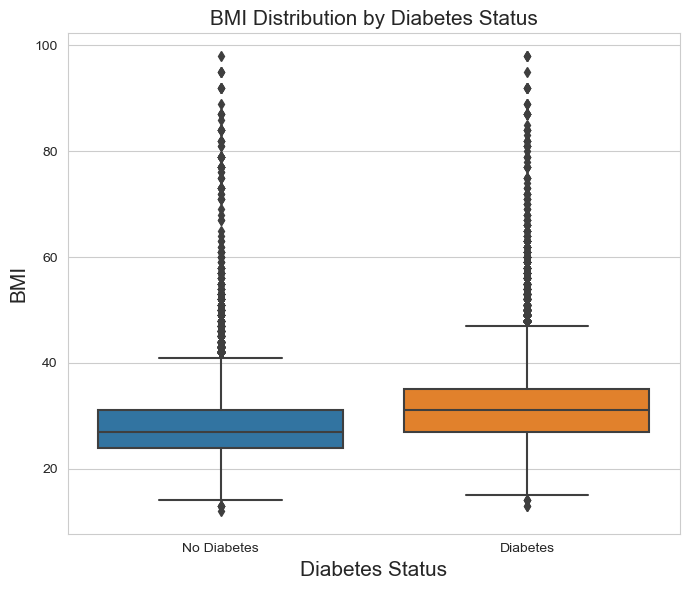

In [ ]:
# Corrected code for a single box plot for BMI against Diabetes_binary outcome
plt.figure(figsize=(7, 6))  # Adjusting the figure size for a single plot

# BMI Distribution across Diabetes_binary
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Status').set_size(15)
plt.xlabel('Diabetes Status').set_size(15)
plt.ylabel('BMI').set_size(15)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Setting custom labels for x-ticks

plt.tight_layout()
plt.show()


### BMI Distribution by Diabetes Status
There's a noticeable difference in the median BMI between individuals with and without diabetes, with those having diabetes showing a higher median BMI. This suggests that higher BMI might be associated with an increased risk of diabetes, consistent with existing research.

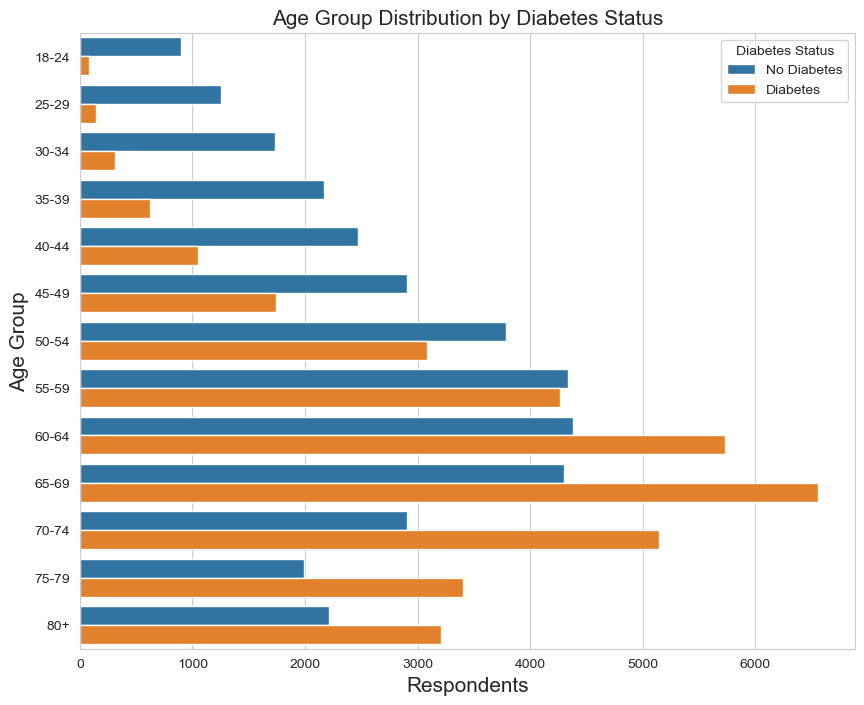

In [ ]:
# Count plot for Age_Label against Diabetes_binary outcome
plt.figure(figsize=(10, 8))
sns.countplot(y='Age_Label', hue='Diabetes_binary', data=df, order=sorted(df['Age_Label'].unique()))
plt.title('Age Group Distribution by Diabetes Status').set_size(15)
plt.xlabel('Respondents').set_size(15)
plt.ylabel('Age Group').set_size(15)
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])
plt.show()


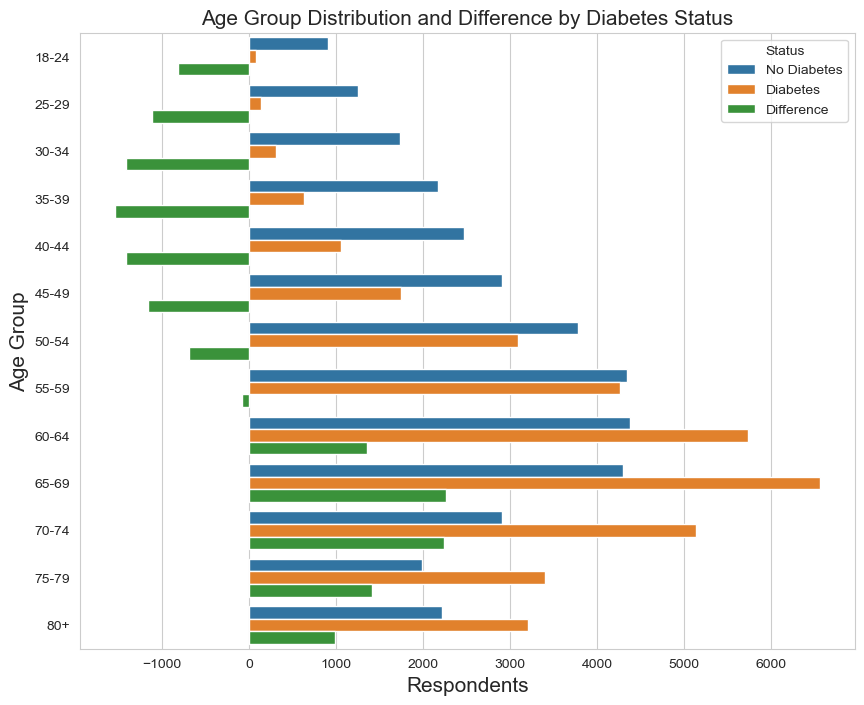

In [ ]:
import numpy as np

# Calculate the counts for each Age_Label and Diabetes_binary outcome
age_counts = df.groupby(['Age_Label', 'Diabetes_binary']).size().unstack(fill_value=0)

# Calculate the difference between the counts of Diabetes_binary status for each Age_Label
age_counts['difference'] = age_counts[1] - age_counts[0]

# Convert the counts and differences into a "long-form" dataframe for plotting
age_counts_long = age_counts.stack().reset_index()
age_counts_long.columns = ['Age_Label', 'Diabetes_Status', 'Count']

# Map the Diabetes_binary to string type for clearer plotting
age_counts_long['Diabetes_Status'] = age_counts_long['Diabetes_Status'].map({0: 'No Diabetes', 1: 'Diabetes', 'difference': 'Difference'})

# Sort the DataFrame based on Age_Label to maintain order
age_counts_long['Age_Label'] = pd.Categorical(age_counts_long['Age_Label'], categories=sorted(df['Age_Label'].unique()), ordered=True)
age_counts_long = age_counts_long.sort_values('Age_Label')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(y='Age_Label', x='Count', hue='Diabetes_Status', data=age_counts_long)
plt.title('Age Group Distribution and Difference by Diabetes Status').set_size(15)
plt.xlabel('Respondents').set_size(15)
plt.ylabel('Age Group').set_size(15)
plt.legend(title='Status')
plt.show()


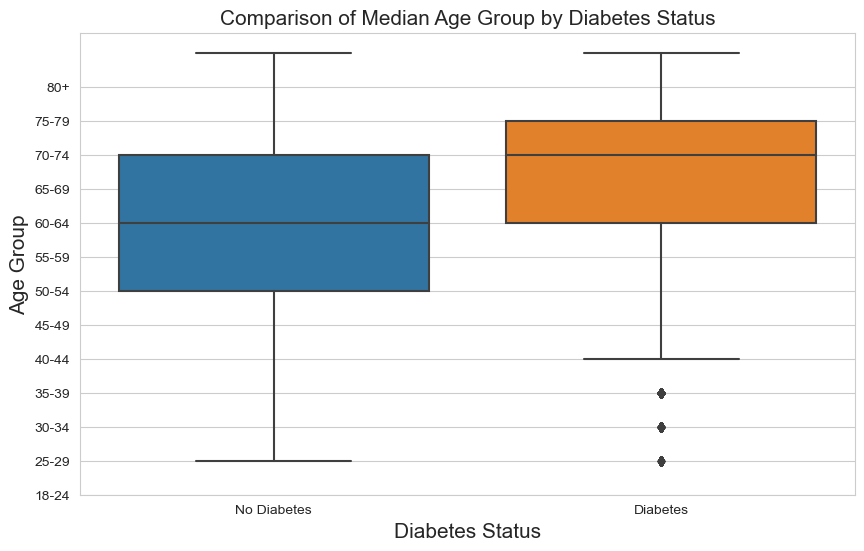

In [ ]:
# Since we're using age groups, we should first assign each individual to an age group based on their 'Age'
# The 'age_labels' dictionary you provided will help map numerical ages to categorical labels

# Map ages to labels
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, float('inf')],
                         labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+'],
                         right=False)

# Filter out the 'Unknown' category from the dataframe
filtered_df = df[df['Age_Group'] != 'Unknown']

# Now create the boxplot without the 'Unknown' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_binary', y='Age', data=filtered_df)
plt.title('Comparison of Median Age Group by Diabetes Status').set_size(15)
plt.xlabel('Diabetes Status').set_size(15)
plt.ylabel('Age Group').set_size(15)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.yticks(range(len(age_labels) - 1), list(age_labels.values())[:-1])  # Exclude 'Unknown' label
plt.show()


### Age Distribution by Diabetes Status

Observations from the provided age distribution chart, when combined with your points, can be summarized in point form as follows:

The majority of individuals within the age groups of 65-69, 70-74, and 75-79 with diabetes outnumber those without diabetes.
A higher proportion of individuals aged 80+ appear to have diabetes compared to younger age brackets.
The chart reflects that the prevalence of diabetes is notably greater in older age groups.
This trend is consistent with the understanding that the risk for developing diabetes increases with age.
The median age of individuals with diabetes is higher than those without diabetes, reinforcing the idea that diabetes risk escalates as people age.

#### Outliers
Observed a small number of outliers in younger adults with diabetes. This could be hereditary but without specialised medical knowledge in this area, we will not speculate and thus, we are not removing these outliers from our analysis.

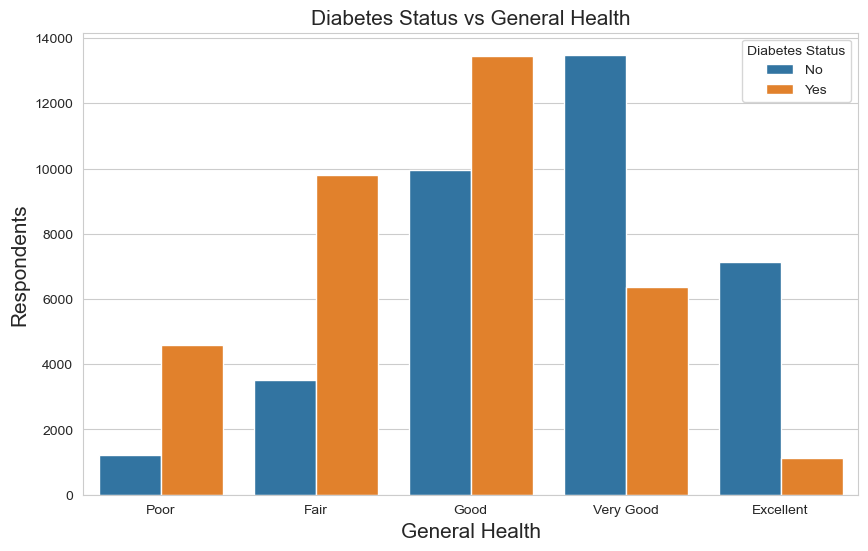

In [ ]:
# Assuming 'GenHlth_Label' has been properly mapped and exists in the dataframe
# Rank the general health categories in the order from 'Poor' to 'Excellent'
health_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Create the count plot with general health categories ordered from 'Poor' to 'Excellent'
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth_Label', data=df, order=health_order, hue='Diabetes_binary')

# Update legend to match the request 'No' for 0 and 'Yes' for 1
plt.legend(title='Diabetes Status', labels=['No', 'Yes'])
plt.title('Diabetes Status vs General Health').set_size(15)
plt.xlabel('General Health').set_size(15)
plt.ylabel('Respondents').set_size(15)
plt.show()


## General Health vs Diabetes Status
The chart depicts the count of individuals by general health status, categorized into 'Excellent', 'Very Good', 'Good', 'Fair', and 'Poor', and further divided by diabetes status.

Here are some observations:

1. **General Health vs. Diabetes Status**: The chart suggests a trend where individuals with poorer self-assessed general health have a higher prevalence of diabetes. This is evident from the higher counts of individuals with 'Fair' or 'Poor' health having diabetes compared to those without diabetes.

2. **Health Perception**: Individuals who rate their health as 'Excellent' are less likely to have diabetes, as shown by the lower count of diabetes in this category. Conversely, as the self-assessment of health declines from 'Very Good' to 'Poor', the count of individuals with diabetes increases.

3. **Largest Differences**: The largest noticeable differences in counts between individuals with and without diabetes occur in the 'Fair' and 'Poor' health categories, suggesting a stronger association of diabetes with lower self-assessed health ratings.

4. **Data Distribution**: The 'Good' and 'Very Good' categories have a high count of individuals without diabetes, which could indicate that a significant number of the surveyed population perceive their health as good or very good while not having diabetes.

These observations can guide more in-depth analyses, such as investigating the reasons behind the association of poorer health perception with diabetes, or exploring other factors that might influence these perceptions and their relationship with chronic health conditions like diabetes.

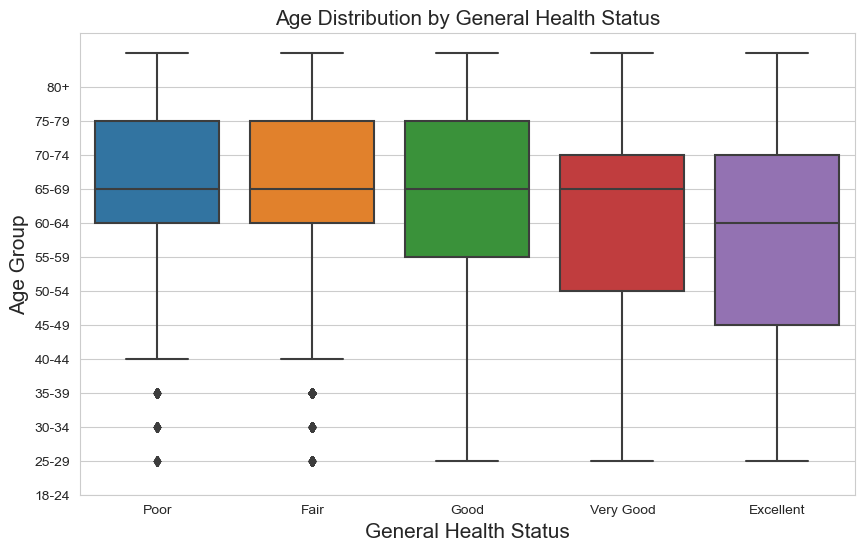

In [ ]:
# Assuming 'Age_Group' has been created with pd.cut as previously discussed and the mapping is correct
# Assuming 'GenHlth' has been mapped to 'GenHlth_Label' as previously discussed

# Filter out the entries where Age_Group is 'Unknown'
filtered_df = df[df['Age_Group'] != 'Unknown']

# Order the general health categories from 'Poor' to 'Excellent'
health_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth_Label', y='Age', data=filtered_df, order=health_order)

# Update y-axis with age group labels, excluding 'Unknown'
age_group_order = ['18-24', '25-29', '30-34', '35-39', '40-44',
                   '45-49', '50-54', '55-59', '60-64', '65-69',
                   '70-74', '75-79', '80+']  # Assuming these are all the groups in 'Age_Group'

plt.yticks(range(len(age_group_order)), age_group_order)

plt.title('Age Distribution by General Health Status').set_size(15)
plt.xlabel('General Health Status').set_size(15)
plt.ylabel('Age Group').set_size(15)
plt.show()


### Bar Plots for Categorical Variables
Such as Smoker, HighBP, and HighChol to compare their prevalence between individuals with and without diabetes. This will help us understand if these conditions are more prevalent among those diagnosed with diabetes.

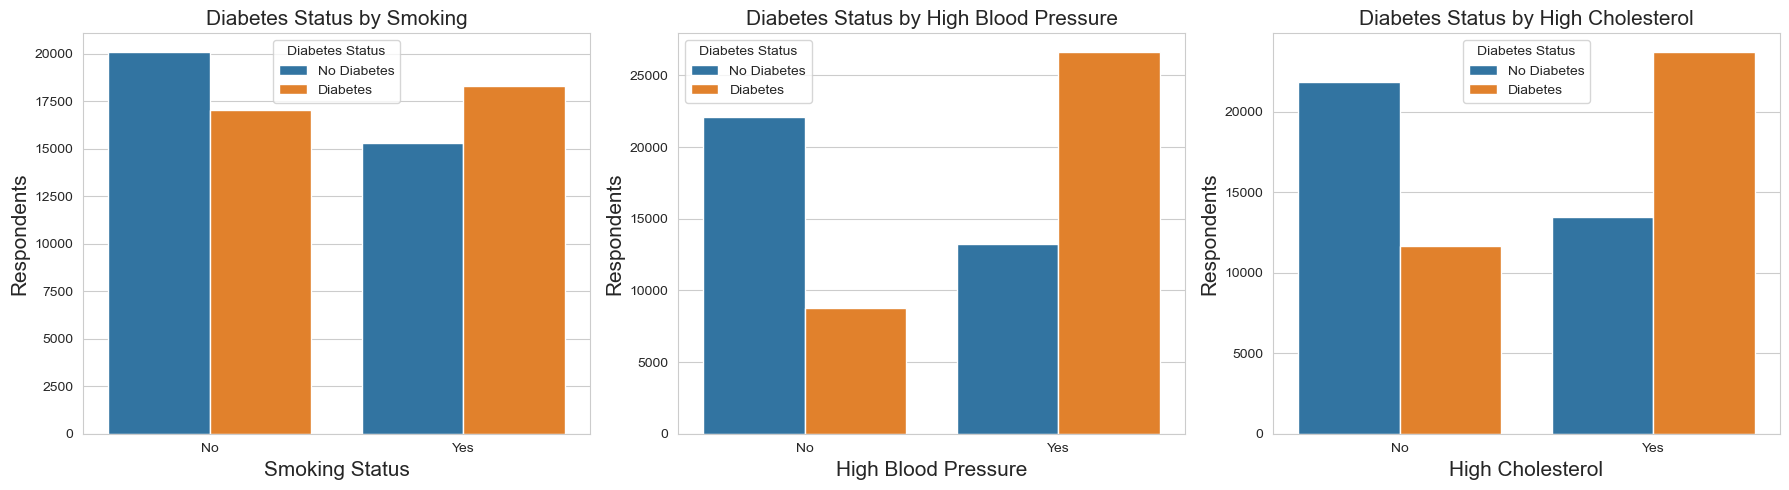

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Smoker
sns.countplot(x='Smoker', hue='Diabetes_binary', data=df, ax=axes[0])
axes[0].set_title('Diabetes Status by Smoking').set_size(15)
axes[0].set_xlabel('Smoking Status').set_size(15)
axes[0].set_ylabel('Respondents').set_size(15)
axes[0].set_xticklabels(['No', 'Yes'])
# Update legend for Diabetes_binary
axes[0].legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

# HighBP
sns.countplot(x='HighBP', hue='Diabetes_binary', data=df, ax=axes[1])
axes[1].set_title('Diabetes Status by High Blood Pressure').set_size(15)
axes[1].set_xlabel('High Blood Pressure').set_size(15)
axes[1].set_ylabel('Respondents').set_size(15)
axes[1].set_xticklabels(['No', 'Yes'])
# Update legend for Diabetes_binary
axes[1].legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

# HighChol
sns.countplot(x='HighChol', hue='Diabetes_binary', data=df, ax=axes[2])
axes[2].set_title('Diabetes Status by High Cholesterol').set_size(15)
axes[2].set_xlabel('High Cholesterol').set_size(15)
axes[2].set_ylabel('Respondents').set_size(15)
axes[2].set_xticklabels(['No', 'Yes'])
# Update legend for Diabetes_binary
axes[2].legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()


## Bar plots for Smoking Status, High Blood Pressure (HighBP), and High Cholesterol (HighChol) across diabetes status

### Smoking and Diabetes
The charts suggest there's not a significant difference in the number of smokers between individuals with and without diabetes. This implies smoking status alone may not show a strong correlation with diabetes presence in this data set.

### High Blood Pressure and Diabetes
A substantial number of individuals with high blood pressure also have diabetes, highlighting the known link between these conditions.

### High Cholesterol and Diabetes
Similar to high blood pressure, high cholesterol appears to be more common among individuals with diabetes. This reinforces the established connection between lipid levels and diabetes risk.

These trends suggest that while smoking status alone is not as strongly associated with diabetes, the presence of high blood pressure and high cholesterol are notable risk factors for the disease. These insights could be important for targeting preventive health measures and managing existing conditions.

In [ ]:
# Subset the DataFrame to include only relevant columns for the chi-squared test
cols_to_keep = ['Diabetes_binary', 'Smoker', 'HighBP', 'HighChol']
subset_df = df[cols_to_keep]

# Convert the relevant columns to categorical if not already
subset_df['Smoker'] = subset_df['Smoker'].astype('category')
subset_df['HighBP'] = subset_df['HighBP'].astype('category')
subset_df['HighChol'] = subset_df['HighChol'].astype('category')

# Initialize a dictionary to hold chi-squared test results
chi_squared_results = {}

# Perform chi-squared test for independence between Diabetes and each of the other variables
for feature in cols_to_keep[1:]:  # Skipping the first column which is the target variable
    contingency_table = pd.crosstab(subset_df['Diabetes_binary'], subset_df[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_squared_results[feature] = {'Chi2': chi2, 'p-value': p}

chi_squared_results



/var/folders/x6/zx_rj6pn4cn9y8cz4ksk65vw0000gn/T/ipykernel_2796/1121155462.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Smoker'] = subset_df['Smoker'].astype('category')
/var/folders/x6/zx_rj6pn4cn9y8cz4ksk65vw0000gn/T/ipykernel_2796/1121155462.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['HighBP'] = subset_df['HighBP'].astype('category')
/var/folders/x6/zx_rj6pn4cn9y8cz4ksk65vw0000gn/T/ipykernel_2796/1121155462.py:13: SettingWithCopyWarning: 
A value is trying to be set

{'Smoker': {'Chi2': 522.4810772937883, 'p-value': 1.2211053080400827e-115},
 'HighBP': {'Chi2': 10287.972984997781, 'p-value': 0.0},
 'HighChol': {'Chi2': 5911.8066998822505, 'p-value': 0.0}}

### Statistical analysis
The output provided contains the results of chi-squared tests examining the association between diabetes status and three other variables: Smoker, HighBP (High Blood Pressure), and HighChol (High Cholesterol). The chi-squared statistic (Chi2) and the p-value for each test are given.

Here's how to interpret these results:

1. **Smoker**:
   - Chi-squared statistic: 522.48
   - p-value: \(1.22 \times 10^{-115}\)
   - The p-value is extremely small, well below the common significance level of 0.05, which indicates a statistically significant association between smoking status and diabetes.

2. **HighBP**:
   - Chi-squared statistic: 10,287.97
   - p-value: 0.0
   - This p-value indicates a p-value so small that it's effectively zero, showing a very strong statistically significant association between high blood pressure and diabetes.

3. **HighChol**:
   - Chi-squared statistic: 5,911.81
   - p-value: 0.0
   - Similarly to HighBP, the p-value is effectively zero, indicating a very strong statistically significant association between high cholesterol and diabetes.

In summary, all three variables—smoking status, high blood pressure, and high cholesterol—show a statistically significant association with diabetes status. High blood pressure and high cholesterol, in particular, show a very strong association based on the high Chi2 values and p-values of zero. This suggests that these factors are potentially important indicators of diabetes in the dataset.

```
+-------------+---------------+------------------+-------------------+
| Feature     | Chi-squared   | p-value          | Association       |
+=============+===============+==================+===================+
| Smoker      | 522.48        | < 0.001          | Significant       |
+-------------+---------------+------------------+-------------------+
| HighBP      | 10287.97      | < 0.001          | Very Strong       |
+-------------+---------------+------------------+-------------------+
| HighChol    | 5911.81       | < 0.001          | Very Strong       |
+-------------+---------------+------------------+-------------------+
```

This table clearly communicates the degree of association each factor has with diabetes status, based on the results of the chi-squared tests.